In [1]:

# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [5]:
#Import dependencies
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0e79bcd0462326c8a41cf4bf26584d4


In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
#Loop through all the cities in our list
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    #Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 toS the record count
    record_count += 1
    #Run an API request for each of the cites 
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #Parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        #Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        #Append the city information into city_data list
        city_data.append({'City': city.title(),
                          'Lat': city_lat, 
                          'Lng': city_lng, 
                          'Max Temp': city_max_temp, 
                          'Humidity': city_humidity, 
                          'Cloudiness': city_clouds, 
                          'Wind Speed': city_wind, 
                          'Country': city_country, 
                          'Date': city_date})
#If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

#Indicate that the Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

4 | zhigansk
Processing Record 5 of Set 4 | nushki
Processing Record 6 of Set 4 | voi
Processing Record 7 of Set 4 | basco
Processing Record 8 of Set 4 | carnarvon
Processing Record 9 of Set 4 | arkadak
Processing Record 10 of Set 4 | mamakan
Processing Record 11 of Set 4 | cabo san lucas
Processing Record 12 of Set 4 | saint-pierre
Processing Record 13 of Set 4 | harrisburg
Processing Record 14 of Set 4 | castro
Processing Record 15 of Set 4 | san patricio
Processing Record 16 of Set 4 | tezu
Processing Record 17 of Set 4 | ancud
Processing Record 18 of Set 4 | lompoc
Processing Record 19 of Set 4 | bonavista
Processing Record 20 of Set 4 | teguldet
Processing Record 21 of Set 4 | mataro
Processing Record 22 of Set 4 | broome
Processing Record 23 of Set 4 | astoria
Processing Record 24 of Set 4 | calvinia
Processing Record 25 of Set 4 | robertsport
Processing Record 26 of Set 4 | coruripe
Processing Record 27 of Set 4 | westport
Processing Record 28 of Set 4 | llanes
Processing Record

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sao Gabriel Da Cachoeira,-0.1303,-67.0892,70.20,99,100,2.48,BR,2021-01-09 05:09:37
1,Nishihara,26.1842,127.7558,51.80,50,90,17.27,JP,2021-01-09 05:09:38
2,Kaitangata,-46.2817,169.8464,59.00,65,68,15.01,NZ,2021-01-09 05:09:38
3,Punta Arenas,-53.1500,-70.9167,48.20,71,40,24.16,CL,2021-01-09 05:09:39
4,Khorramshahr,30.4397,48.1664,44.60,87,0,4.45,IR,2021-01-09 05:09:39
...,...,...,...,...,...,...,...,...,...
567,Valle De Allende,26.9333,-105.4000,51.89,39,16,8.14,MX,2021-01-09 05:12:07
568,Ixtapa,20.7000,-105.2000,69.01,93,1,2.04,MX,2021-01-09 05:12:07
569,Yabelo,4.8833,38.0833,62.24,39,20,6.04,ET,2021-01-09 05:12:08
570,Altay,47.8667,88.1167,2.77,88,100,2.19,CN,2021-01-09 05:12:08


In [8]:
#Reorder the columns
new_column = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sao Gabriel Da Cachoeira,BR,2021-01-09 05:09:37,-0.1303,-67.0892,70.20,99,100,2.48
1,Nishihara,JP,2021-01-09 05:09:38,26.1842,127.7558,51.80,50,90,17.27
2,Kaitangata,NZ,2021-01-09 05:09:38,-46.2817,169.8464,59.00,65,68,15.01
3,Punta Arenas,CL,2021-01-09 05:09:39,-53.1500,-70.9167,48.20,71,40,24.16
4,Khorramshahr,IR,2021-01-09 05:09:39,30.4397,48.1664,44.60,87,0,4.45
5,Yellowknife,CA,2021-01-09 05:09:40,62.4560,-114.3525,-2.20,84,1,6.91
6,Bennettsville,US,2021-01-09 05:09:40,34.6174,-79.6848,39.99,100,90,3.44
7,Mago,RU,2021-01-09 05:09:40,53.2514,140.1822,-13.76,86,100,4.14
8,Hilo,US,2021-01-09 05:06:27,19.7297,-155.0900,73.40,78,75,2.86
9,Busselton,AU,2021-01-09 05:09:41,-33.6500,115.3333,100.99,27,33,3.00


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

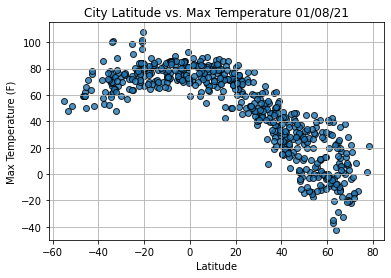

In [11]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

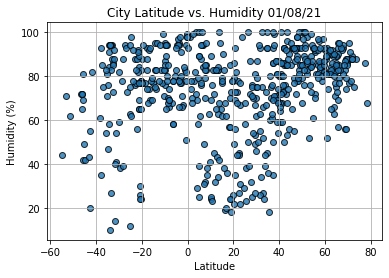

In [12]:
#Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity, 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity '+ time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

#Save the figure
plt.savefig('weather_data/Fig2.png')

#Show plot
plt.show()

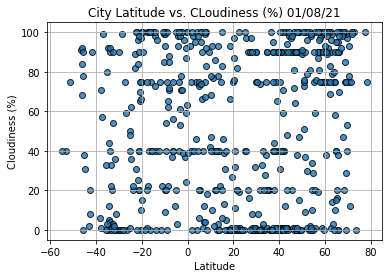

In [13]:
#Build the scatter plot for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness, 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f'City Latitude vs. CLoudiness (%) '+ time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

#Save the figure
plt.savefig('weather_data/Fig3.png')

#Show plot
plt.show()

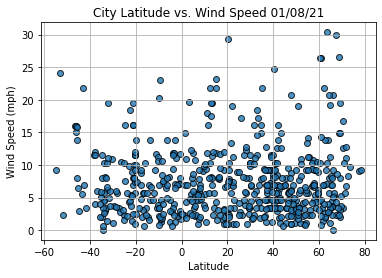

In [14]:
#Build the scatter plot for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed, 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed '+ time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

#Save the figure
plt.savefig('weather_data/Fig4.png')

#Show plot
plt.show()

In [15]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [16]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]


In [17]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [18]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

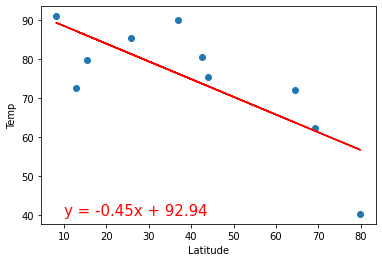

In [23]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [28]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [33]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
northern_hemi_df
southern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sao Gabriel Da Cachoeira,BR,2021-01-09 05:09:37,-0.1303,-67.0892,70.20,99,100,2.48
2,Kaitangata,NZ,2021-01-09 05:09:38,-46.2817,169.8464,59.00,65,68,15.01
3,Punta Arenas,CL,2021-01-09 05:09:39,-53.1500,-70.9167,48.20,71,40,24.16
9,Busselton,AU,2021-01-09 05:09:41,-33.6500,115.3333,100.99,27,33,3.00
10,Cape Town,ZA,2021-01-09 05:07:55,-33.9258,18.4232,66.99,94,40,4.61
...,...,...,...,...,...,...,...,...,...
538,Alto Piquiri,BR,2021-01-09 05:11:59,-24.0281,-53.4406,70.34,92,22,2.10
547,Goianinha,BR,2021-01-09 05:12:00,-6.2647,-35.2125,78.80,78,40,8.05
550,Richards Bay,ZA,2021-01-09 05:12:01,-28.7830,32.0377,75.99,78,99,6.06
553,Melo,UY,2021-01-09 05:08:03,-32.3667,-54.1833,62.24,92,2,6.67


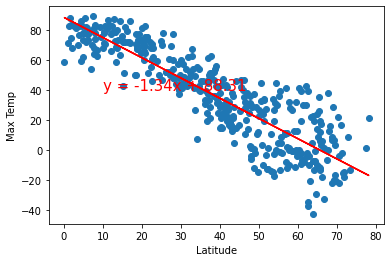

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))


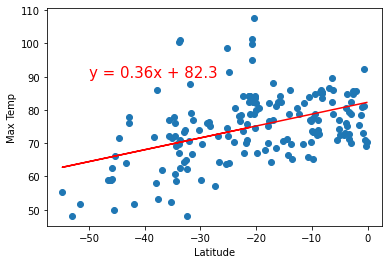

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

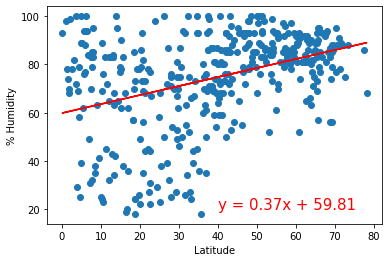

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,20))

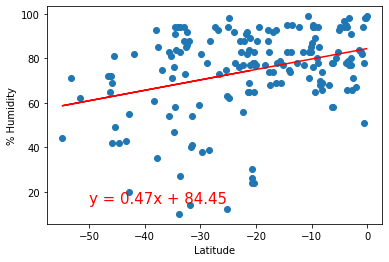

In [47]:
#Linear regression on the Southern Hemisphere (Humidity)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity', (-50,15))


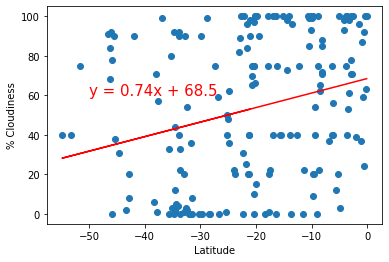

In [48]:
#Linear regression on the Southern Hemisphere (Cloudiness)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness', (-50,60))

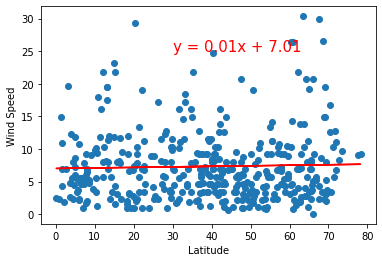

In [53]:
#Linear regression on the Northern Hemisphere (Wind Speed)
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed', (30,25))

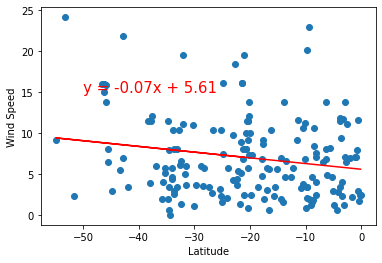

In [54]:
#Linear regression on the Southern Hemisphere (Wind Speed)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed', (-50,15))